## Support Vector Machine


# P0: Intro

Sentiment Analysis is a Natural Language Processing technique that allows us to determine the sentiment or opinion of a given text. It is a very useful technique that allows us to extract insights from social media, customer feedback, product reviews, etc. This assignment focuses on building a sentiment classifier using the SVM algorithm. You are given a dataset of tweets along with their corresponding sentiments. Your task is to build a classifier that can determine the sentiment of a given tweet.

# P1: Data Exploration

The dataset provided to you includes one file: `sentiment.csv`.
Run the below cells to download the data.

In [1]:
!pip install gdown

In [2]:
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1XHeTYh-jGBHq1lpbOVq1HX-N4EsUIQgA'
path = 'sentiment.csv'
gdown.download(url, path, quiet=True)
data = pd.read_csv(path, encoding = "ISO-8859-1")
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## The Distribution of Labels

Extract the labels of the Sentiment column and plot the distribution of samples according to it. 

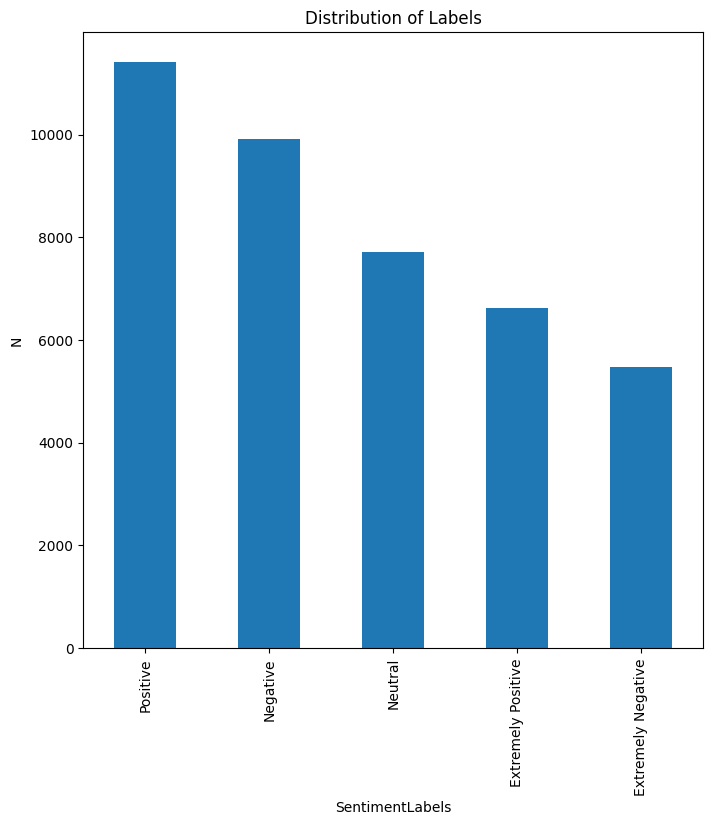

In [3]:
import matplotlib.pyplot as plt
sentimentLabels = data['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))
sentimentLabels.plot(kind='bar')

plt.title("Distribution of Labels")
plt.xlabel("SentimentLabels")
plt.ylabel("N")
plt.show()

## Texts Distribution

Plot the distribution of tweets according to their lengths. 

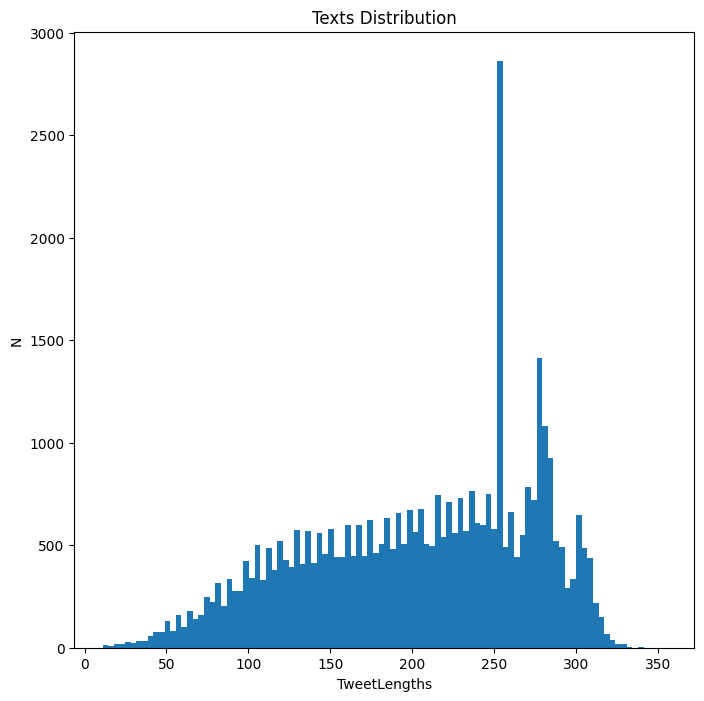

In [4]:
tweets = data['OriginalTweet']

plt.figure(figsize=(8, 8))
plt.hist(tweets.apply(len),bins=100)

plt.title("Texts Distribution")
plt.xlabel("TweetLengths")
plt.ylabel("N")
plt.show()

## Outliers

According to the obtained distributions, It is necessary to remove outliers.

In [5]:
data['tweet_length'] = tweets.apply(len)
p1 = data['tweet_length'].quantile(0.20)
p2 = data['tweet_length'].quantile(0.80)
dif = p2 - p1

proc_data = data[~((data['tweet_length'] < (p1 - 1.5*dif)) | (data['tweet_length'] > (p2 + 1.5*dif)))]

print("number of removed samples : ",len(data) - len(proc_data))

proc_data.head()

number of removed samples :  0


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,tweet_length
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310


## Missing Values

What percentage of dataset rows should be deleted due to missing values? Delete these row in the dataset cleaning section. 

In [6]:
missing_percentage = (proc_data.isnull().sum() / len(proc_data)) * 100
for col, percentage in missing_percentage.items():
    print(f"{percentage:.2f}% of data due {col} should be deleted")

cleaned_data = proc_data.dropna(subset=['OriginalTweet'], axis=0)


0.00% of data due UserName should be deleted
0.00% of data due ScreenName should be deleted
20.87% of data due Location should be deleted
0.00% of data due TweetAt should be deleted
0.00% of data due OriginalTweet should be deleted
0.00% of data due Sentiment should be deleted
0.00% of data due tweet_length should be deleted


## Most Frequent Words

Use the `nltk` library and plot the 30 most frequent words in order of occurrence. Then do this for each set of positive, negative and neutral tweets separately. 

In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Positive Tweets


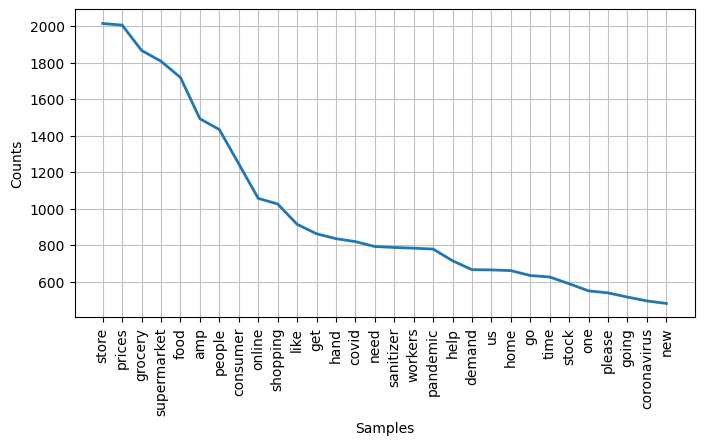

---------------------
Negative Tweets


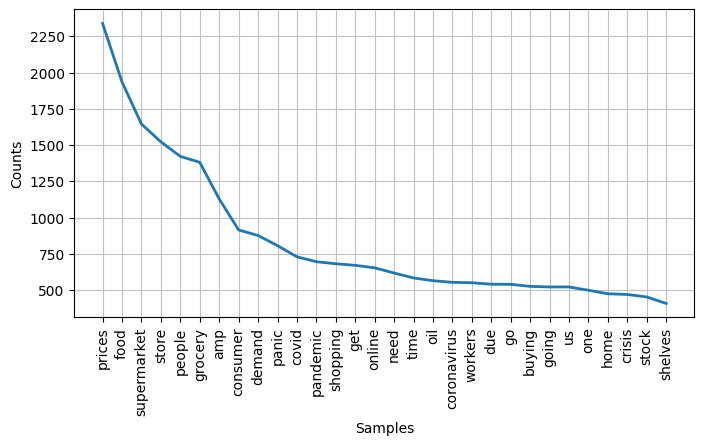

---------------------
Neutral Tweets


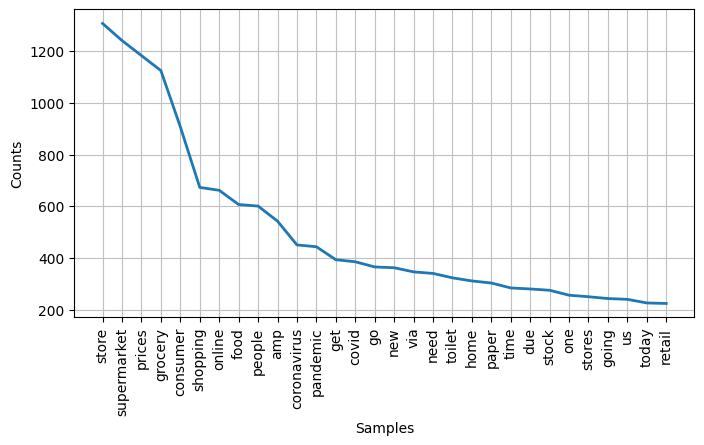

In [8]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

positive_tweets = cleaned_data[cleaned_data['Sentiment'] == 'Positive']['OriginalTweet']
negative_tweets = cleaned_data[cleaned_data['Sentiment'] == 'Negative']['OriginalTweet']
neutral_tweets = cleaned_data[cleaned_data['Sentiment'] == 'Neutral']['OriginalTweet']


def plot_frequent_words(tweets):
    if isinstance(tweets, pd.Series):
        tweets = " ".join(tweets)

    tweets = re.sub(r'http\S+', '', tweets) 
    tweets = re.sub(r'@\S+|#\S+', '', tweets)
    words = word_tokenize(tweets.lower())
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]    
    freq_dist = FreqDist(filtered_words)
    plt.figure(figsize=(8, 4))
    freq_dist.plot(30, cumulative=False)
    plt.show()

print('Positive Tweets')
plot_frequent_words(positive_tweets)
print('---------------------')
print('Negative Tweets')
plot_frequent_words(negative_tweets)
print('---------------------')
print('Neutral Tweets')
plot_frequent_words(neutral_tweets)

# P2: Preprocessing

## Dataset Cleaning

Remove unrelevant columns and do other necessary cleanings.

In [9]:
cleaned_data = cleaned_data[['OriginalTweet', 'Sentiment']]
cleaned_data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## Labeling

Based on the `Sentiment` column, generate 3 labels by considering the extremely positive tweets as positive and the extremely negative ones as negatives. 

In [10]:
def change_sentiments(sentiment):
    return "Positive" if sentiment in ["Positive", "Extremely Positive"] else "Negative" if sentiment in ["Negative", "Extremely Negative"] else "Neutral"

cleaned_data = cleaned_data.copy()
cleaned_data['Sentiment'] = cleaned_data['Sentiment'].apply(change_sentiments)
cleaned_data.head()


,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative


## Text Cleaning

Remove urls from tweets with regex. (Use pattern `r'https?://\S+|www\.\S+'`) 

In [11]:
clean_url = lambda tweet: re.sub(r'https?://\S+|www\.\S+', '', tweet)
cleaned_data['OriginalTweet'] = cleaned_data['OriginalTweet'].apply(clean_url)
cleaned_data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv and and,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative


Remove everything except alphabetical and numerical characters. (Use pattern `[^a-zA-Z0-9]`) 

In [12]:
clean_everything = lambda tweet: re.sub(r'[^a-zA-Z0-9]', ' ', tweet)
cleaned_data['OriginalTweet'] = cleaned_data['OriginalTweet'].apply(clean_everything)
cleaned_data.head()

,OriginalTweet,Sentiment
0,MeNyrbie Phil Gahan Chrisitv and and,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,Me ready to go at supermarket during the COV...,Negative


Lower all letters. Then use `nltk` and tokenize tweets. Then replace each word with its root and remove the stopwords. 

In [13]:
from nltk.stem import PorterStemmer


stopwords_set = set(stopwords.words("english"))

def process_tweet(tweet):
    porter_stemmer = PorterStemmer()
    return " ".join([porter_stemmer.stem(word.lower()) for word in word_tokenize(tweet) if word.lower() not in stopwords_set])

cleaned_data['OriginalTweet'] = cleaned_data['OriginalTweet'].apply(process_tweet)
cleaned_data.head()

,OriginalTweet,Sentiment
0,menyrbi phil gahan chrisitv,Neutral
1,advic talk neighbour famili exchang phone numb...,Positive
2,coronaviru australia woolworth give elderli di...,Positive
3,food stock one empti pleas panic enough food e...,Positive
4,readi go supermarket covid19 outbreak paranoid...,Negative


## Feature Generation

Use `CountVectorizer` class (belonging to `sklearn`) construct a feature vector from each tweet.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cleaned_data.reset_index(drop=True, inplace=True)

vectorizer = CountVectorizer(max_features=30)
feature_vectors = vectorizer.fit_transform(cleaned_data['OriginalTweet'].tolist())
feature_vectors_df = pd.DataFrame(feature_vectors.toarray(), columns=vectorizer.get_feature_names_out())
feature_vectors_df.head()



,19,amp,buy,consum,coronaviru,covid,covid19,food,get,go,...,price,sanit,shop,stock,store,supermarket,time,us,work,worker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,1,1,1,2,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,1,1,0,1,...,0,0,0,1,0,1,0,0,0,0


# P3: Modeling

Convert the dataset to a dataframe (or some `numpy` arrays) and split it into train and test sets.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

y = cleaned_data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(feature_vectors_df, y, test_size=0.5, random_state=42)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = np.where(y_train == 2, 1, 0)
y_test = np.where(y_test == 2, 1, 0)
print(y_train)

[1 1 1 ... 0 0 0]


Use the `SVC` class (belonging to `sklearn`) to train a SVM classifier. 

In [16]:
from sklearn.svm import SVC

sklearn_svm = SVC(kernel="linear")
sklearn_svm = sklearn_svm.fit(X_train, y_train)

Complete the definition of the following class to implement a SVM classifier capable of separating only the positive and negative classes. 


In [17]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float)

        y_ = np.where(y <= 0, -1, 1)

        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        X = np.asarray(X, dtype=float)
        linear_output = np.dot(X, self.w) - self.b
        return np.where(linear_output >= 0, 1, 0)
    

Train the binary SVM classifier using the class you have implemented. 

In [18]:
my_svm = SVM()
my_svm.fit(X_train, y_train)

# P4: Evaluation

Using the model you trained using `sklearn`, predict the labels of the test set. 

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

sklearn_pred = sklearn_svm.predict(X_test)
sklearn_acc = accuracy_score(y_test, sklearn_pred)
print("Sklearn Accuracy: ",sklearn_acc)

Sklearn Accuracy:  0.6401185674716945


Using the model you trained from scratch, predict the labels of the test set.

In [20]:
my_svm_pred = my_svm.predict(X_test)
my_svm_acc = accuracy_score(y_test, my_svm_pred)
print("My SVM  Accuracy: ",my_svm_acc)

My SVM  Accuracy:  0.6309344477379853


Plot the normalized confusion matrix of the predictions for each model.

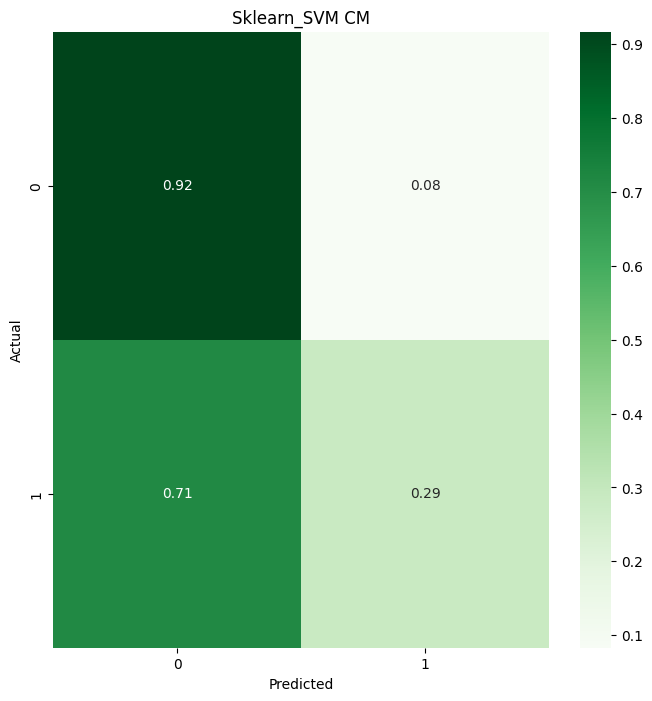

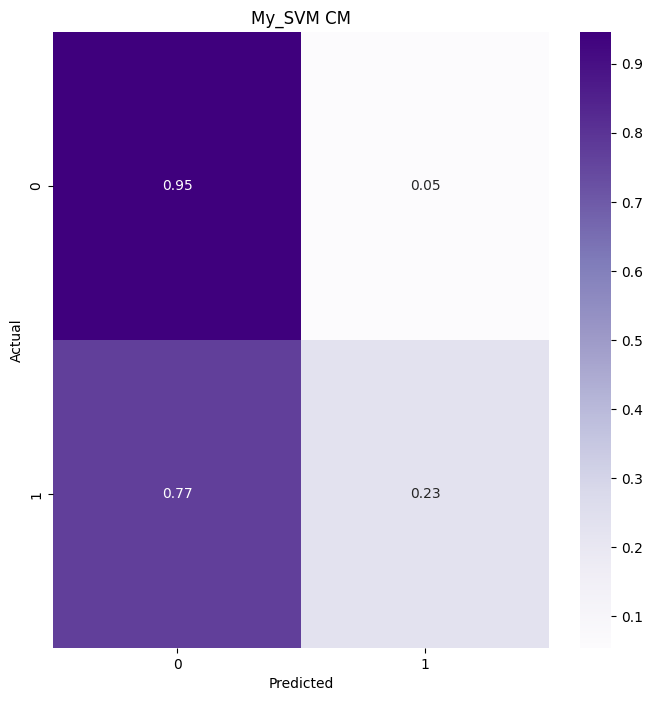

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title, color_map):
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap=color_map, xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    

sklearn_cm = confusion_matrix(y_test, sklearn_pred, normalize='true')
plot_confusion_matrix(sklearn_cm, 'Sklearn_SVM CM', "Greens")

my_svm_cm = confusion_matrix(y_test, my_svm_pred, normalize='true')
plot_confusion_matrix(my_svm_cm, 'My_SVM CM', "Purples")
